# HYPERTENSION SBP

Last modification: 03/07/2023

In [1]:
import function_diseases_associations as fda
import function_figures_associations as ffa

In [47]:
# REQUIRED FOR THE FIRST PART: COMPUTING THE BETAS AND PVALUES
compute_betas_pvalues= False #True
only_main_vascular_phenotypes = True #True
save_additional_figs = False
display_info=True
file_info_name='pheno_diseases_info.csv'
pheno_info_file = f'/SSD/home/sofia/retina-phenotypes/complementary/{file_info_name}'
diseases_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/2022_11_23_covar_fix_diseases_cov.csv'
pheno_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/participant_phenotype/2022_11_23_covar_fix_z_corrected.csv'
output_dir ='/SSD/home/sofia/retina-phenotypes/complementary/disease_association/'

In [48]:
if only_main_vascular_phenotypes:
    list_phenotypes=["tau1_artery", "tau1_vein", "D_A_std", "D_V_std", "bifurcations", "VD_orig_artery", "VD_orig_vein", 
                     "ratio_VD", "mean_angle_taa" , "mean_angle_tva", "eq_CRAE", "eq_CRVE", "ratio_CRAE_CRVE",
                     "medianDiameter_artery", "medianDiameter_vein", "ratio_AV_medianDiameter"]
else:
    list_phenotypes=['AVScore_all', 'tau1_all', 'tau1_artery', 'tau1_vein', 'tau2_all', 'tau2_artery', 'tau2_vein', 
                     'tau4_all', 'tau4_artery', 'tau4_vein', 'D_std', 'D_A_std', 'D_V_std', 'D_median_CVMe', 'D_CVMe', 
                     'D_CVMe_A', 'D_CVMe_V', 'N_median_main_arteries', 'N_median_main_veins', 'arcLength_artery', 'arcLength_vein', 
                     'bifurcations', 'VD_orig_all', 'VD_orig_artery', 'VD_orig_vein', 'ratio_VD', 'slope', 'slope_artery', 'slope_vein', 
                     'mean_angle_taa', 'mean_angle_tva', 'medianCenter1_artery', 'medianCenter1_vein', 'medianCenter2_artery', 'medianCenter2_vein', 
                     'eq_CRAE', 'eq_CRVE', 'median_CRAE', 'median_CRVE', 'ratio_CRAE_CRVE', 'ratio_median_CRAE_CRVE', 'medianDiameter_all',
                     'medianDiameter_artery','medianDiameter_vein', 'ratio_AV_medianDiameter']

# FIRST PART: COMPUTE BETAS AND PVALUES

In [54]:

df_diseases, inf, list_diseases, list_diseases_bin, list_diseases_con, list_diseases_cat = fda.read_diseases_files(diseases_file, pheno_info_file)

####################### 2 - Phenotypes:

df_pheno =  fda.read_pheno(pheno_file)

####################### 3 - Merge diseases and phenotpyes
df_pheno_dise = fda.merge_pheno_diseases(df_pheno, df_diseases)

# Filtrate only by the phenotypes and diseases of interest
df_pheno_dise = fda.filtrate_col(df_pheno_dise, list_phenotypes+list(list_diseases))

# Replace nans by 0's in cases/controls
df_pheno_dise = fda.column_startwith_replace_nan_by_0(df_pheno_dise)

# Standardise continuous diseasesa and continuous phenotypes if not z-scored
df_pheno_dise =  fda.std_contin_col(df_pheno_dise, list_diseases_con)

# Check the type of variables and convert objects to numeric:

### convert to type numeric the columns that are not
df_pheno_dise['date_reported_atherosclerosis'] = pd.to_numeric(df_pheno_dise['date_reported_atherosclerosis']) # 'date_disorders_arteries_arterioles', 'date_AD', 'date_death',
df_pheno_dise = fda.col_to_numeric(df_pheno_dise)


Len BEFORE merge: pheno size , diseases size:  68324 81859
Len AFTER merge:  68324
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68324 entries, 0 to 68323
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   tau1_artery                               68088 non-null  float64
 1   tau1_vein                                 68012 non-null  float64
 2   D_A_std                                   67993 non-null  float64
 3   D_V_std                                   67993 non-null  float64
 4   bifurcations                              67751 non-null  float64
 5   VD_orig_artery                            68249 non-null  float64
 6   VD_orig_vein                              68249 non-null  float64
 7   ratio_VD                                  68043 non-null  float64
 8   mean_angle_taa                            54949 non-null  float64
 9   mean_angle_tva        

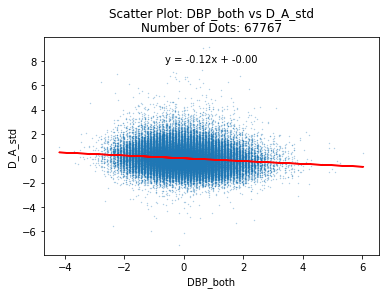

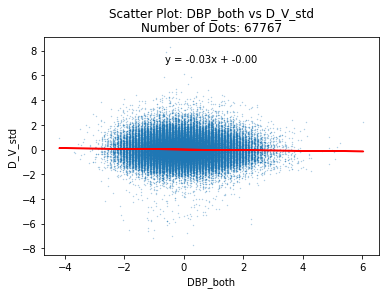

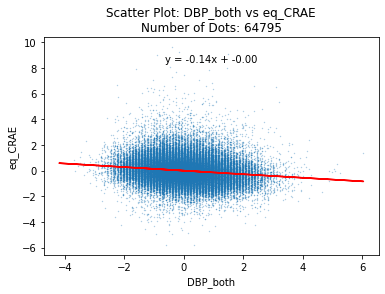

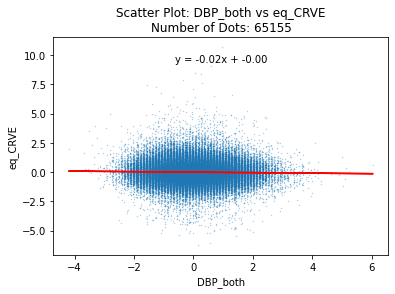

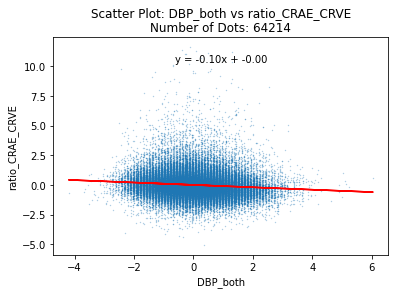

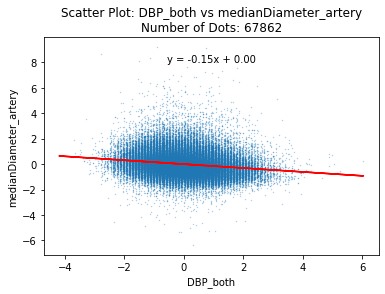

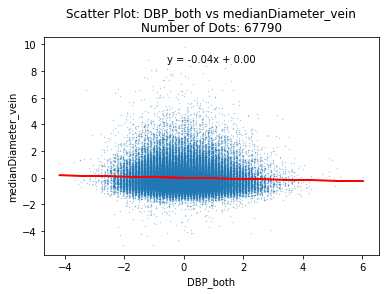

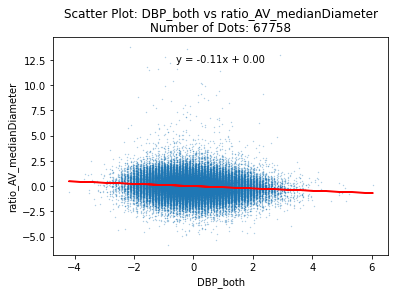

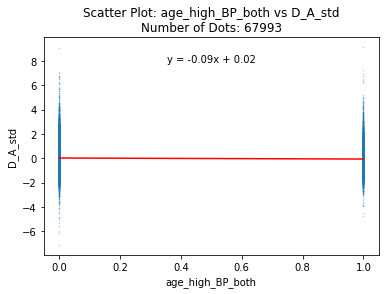

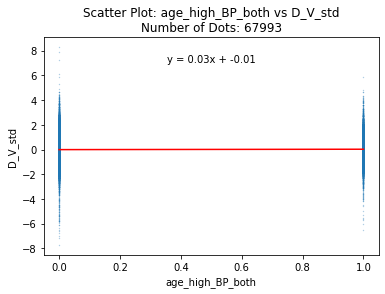

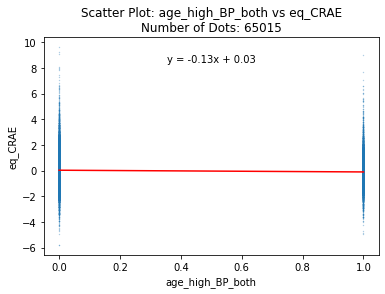

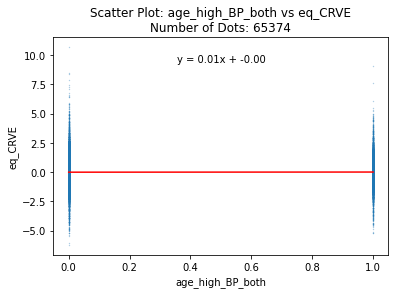

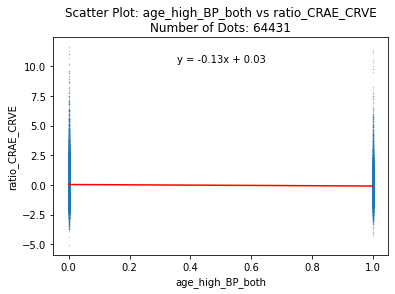

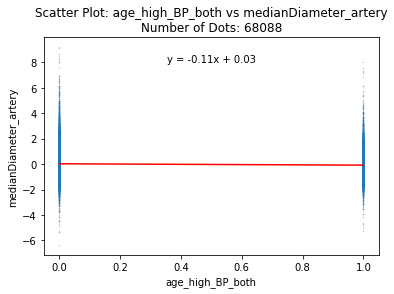

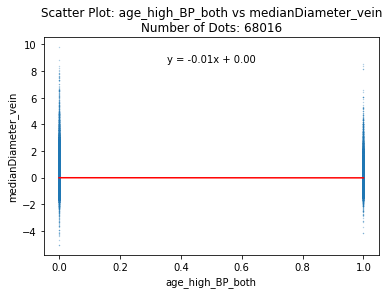

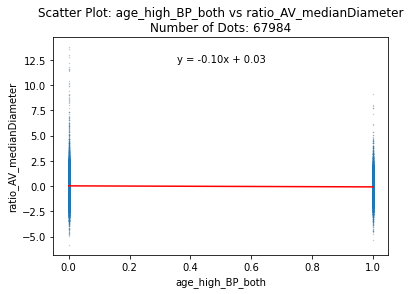

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def scatter_both(col_1, col_2):
    # Remove rows with NaN values in col_1 or col_2
    df_cleaned = df_pheno_dise[[col_1, col_2]].dropna()
    
    # Extract the cleaned data
    col_1_cleaned = df_cleaned[col_1]
    col_2_cleaned = df_cleaned[col_2]
    
    plt.scatter(col_1_cleaned, col_2_cleaned, alpha=0.5, s=0.1)
    
    # Calculate and plot the tendency line
    m, b = np.polyfit(col_1_cleaned, col_2_cleaned, 1)
    plt.plot(col_1_cleaned, m * col_1_cleaned + b, color='red')
    
    # Add equation of the line to the plot
    equation = f'y = {m:.2f}x + {b:.2f}'
    plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
    
    # Add axis labels
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    
    # Add title with the column names and number of dots
    plt.title(f'Scatter Plot: {col_1} vs {col_2}\nNumber of Dots: {len(df_cleaned)}')
    
    plt.show()


df_pheno_dise['SBP_both']
df_pheno_dise['age_high_BP_both']

df_pheno_dise['D_A_std']
df_pheno_dise['D_V_std']
df_pheno_dise['eq_CRAE']
df_pheno_dise['eq_CRVE']
df_pheno_dise['ratio_CRAE_CRVE']
df_pheno_dise['medianDiameter_artery']
df_pheno_dise['medianDiameter_vein']
df_pheno_dise['ratio_AV_medianDiameter']

#scatter_both('SBP_both', 'age_high_BP_both')
#scatter_both('DBP_both', 'age_high_BP_both')
for c1 in ['DBP_both', 'age_high_BP_both']:
    for c2 in ['D_A_std', 'D_V_std', 'eq_CRAE', 'eq_CRVE', 'ratio_CRAE_CRVE', 'medianDiameter_artery', 'medianDiameter_vein', 'ratio_AV_medianDiameter']:
        scatter_both(c1, c2)